In [5]:
#Q2

In [7]:
from sklearn import svm
import numpy as np
import matplotlib.pyplot as plt
alg = np.linalg

In [8]:
N = 1000

In [9]:
def gen_samples(size,mu_1,mu_2,sig1,sig2):
    data = (np.random.multivariate_normal(mu_1,sig1,size), np.random.multivariate_normal(mu_2, sig2, size))
    labels = (np.full((size,),1),np.full((size,),-1))
    return np.concatenate(data),np.concatenate(labels)

In [10]:
mu_1 = [1,1]
mu_2 = [-1,-1]

x_t, y_t = gen_samples(N,mu_1,mu_2,[[1,0],[0,1]],[[3,0],[0,3]])
x,y = gen_samples(N,[1,1],[-1,-1],[[1,0],[0,1]],[[3,0],[0,3]])

In [67]:
#function to handle the plotting and calculations
from sklearn.metrics import accuracy_score

def svc_format(C,gamma):
    clf = svm.SVC(kernel='rbf',C = C, gamma = gamma)
    clf.fit(x_t,y_t)
    y_pred = clf.predict(x)
    #now plot the graph
    plt.plot(x,y_pred)
    print("# of support vectors: " + str(len(clf.support_vectors_)))
    print("accuracy of test: " + str(accuracy_score(y_t,y_pred)))
    plt.show()

In [68]:
#PART A

# of support vectors: 803
accuracy of test: 0.868


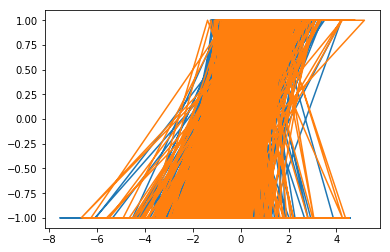

In [69]:
#gamma = 0.01
svc_format(1,0.01)

# of support vectors: 683
accuracy of test: 0.8655


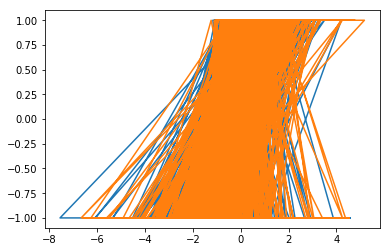

In [70]:
#gamma = 0.1
svc_format(1,0.1)

# of support vectors: 756
accuracy of test: 0.8665


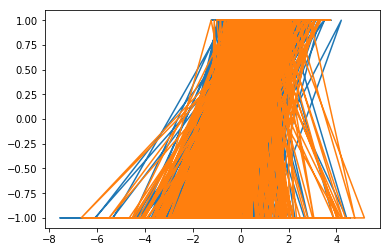

In [71]:
#gamma = 1
svc_format(1,1)

# of support vectors: 1243
accuracy of test: 0.86


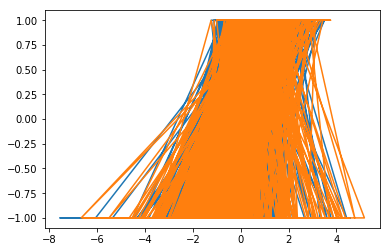

In [72]:
#gamma = 10
svc_format(1,10)

# of support vectors: 1776
accuracy of test: 0.8155


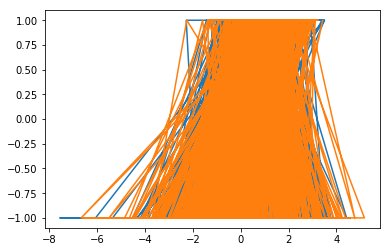

In [73]:
#gamma = 100
svc_format(1,100)

# of support vectors: 1987
accuracy of test: 0.666


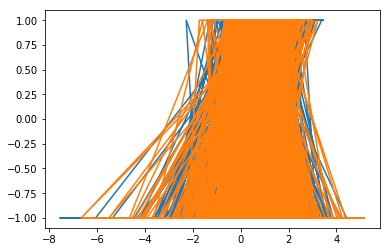

In [74]:
#gamma = 1000
svc_format(1,1000)

In [75]:
#PART B

# of support vectors: 1676
accuracy of test: 0.8475


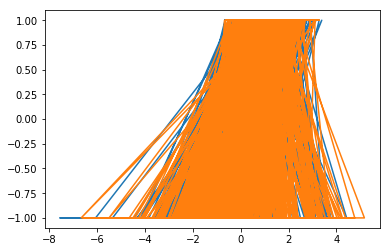

In [76]:
#C = 0.01
svc_format(0.01,1)

# of support vectors: 895
accuracy of test: 0.868


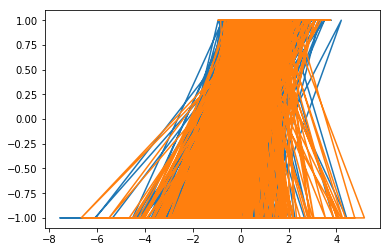

In [77]:
#C = 0.1
svc_format(0.1,1)

# of support vectors: 756
accuracy of test: 0.8665


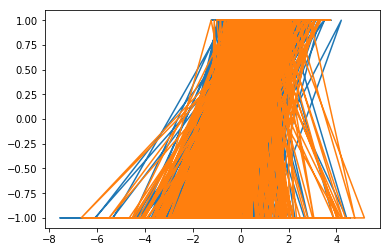

In [78]:
#C = 1
svc_format(1,1)

# of support vectors: 691
accuracy of test: 0.8655


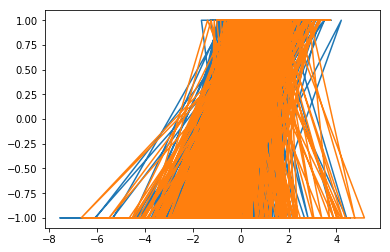

In [79]:
#C = 10
svc_format(10,1)

# of support vectors: 686
accuracy of test: 0.866


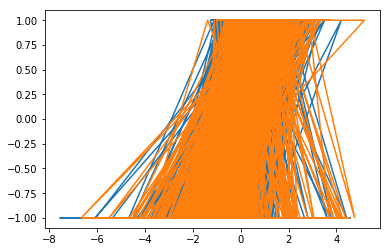

In [80]:
#C = 100
svc_format(100,1)

# of support vectors: 638
accuracy of test: 0.8635


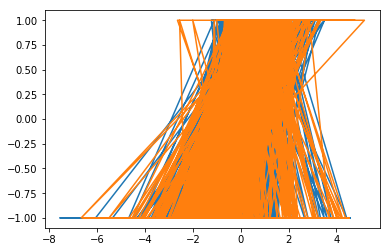

In [81]:
#C = 1000
svc_format(1000,1)

# of support vectors: 1676
accuracy of test: 0.8475


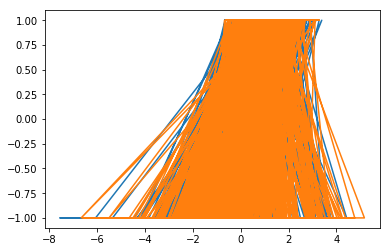

In [82]:
#C = 0.01
svc_format(0.01,1)

# of support vectors: 895
accuracy of test: 0.868


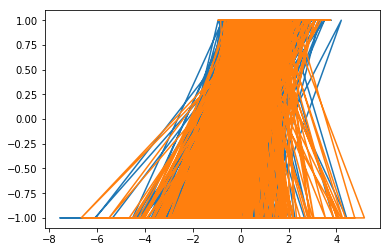

In [83]:
#C = 0.1
svc_format(0.1,1)

# of support vectors: 756
accuracy of test: 0.8665


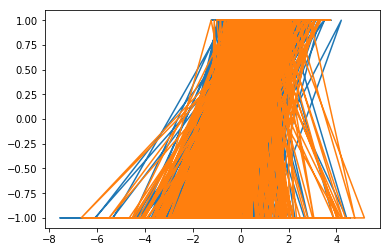

In [84]:
#C = 1
svc_format(1,1)

# of support vectors: 691
accuracy of test: 0.8655


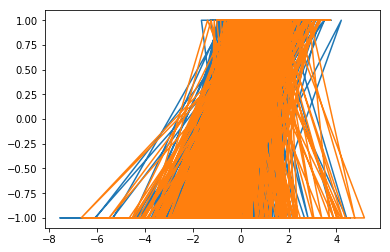

In [85]:
#C = 10
svc_format(10,1)

# of support vectors: 686
accuracy of test: 0.866


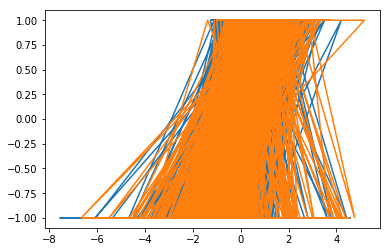

In [86]:
#C = 100
svc_format(100,1)

# of support vectors: 638
accuracy of test: 0.8635


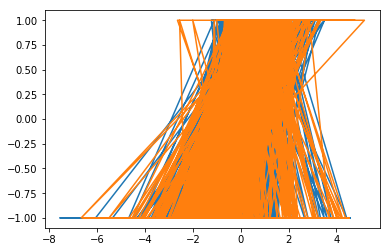

In [87]:
#C = 1000
svc_format(1000,1)

In [96]:
#linear kernel instead
#function to handle the plotting and calculations
def svc_format_linear(C,gamma):
    clf = svm.SVC(kernel='linear',C = C, gamma = gamma)
    clf.fit(x_t,y_t)
    y_pred = clf.predict(x)
    #now plot the graph
    plt.plot(x,y_pred)
    print("# of support vectors: " + str(len(clf.support_vectors_)))
    print("accuracy of test: " + str(accuracy_score(y_t,y_pred)))
    plt.show()

In [97]:
#PART C

# of support vectors: 866
accuracy of test: 0.851


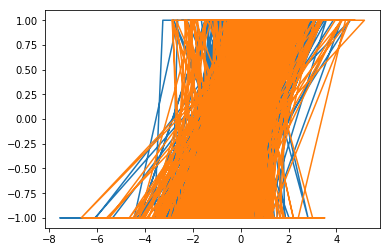

In [98]:
#C = 0.01
svc_format_linear(0.01,1)

# of support vectors: 796
accuracy of test: 0.8515


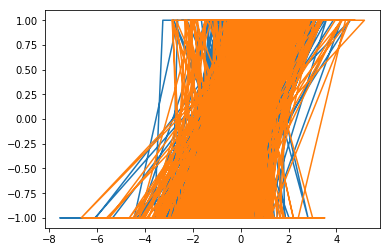

In [99]:
#C = 0.1
svc_format_linear(0.1,1)

# of support vectors: 786
accuracy of test: 0.854


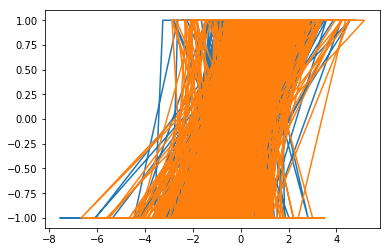

In [100]:
#C = 1
svc_format_linear(1,1)

# of support vectors: 786
accuracy of test: 0.854


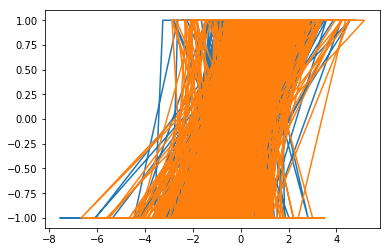

In [101]:
#C = 10
svc_format_linear(10,1)

# of support vectors: 786
accuracy of test: 0.854


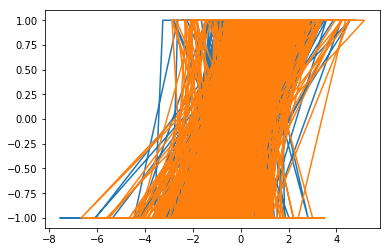

In [102]:
#C = 100
svc_format_linear(100,1)

# of support vectors: 786
accuracy of test: 0.854


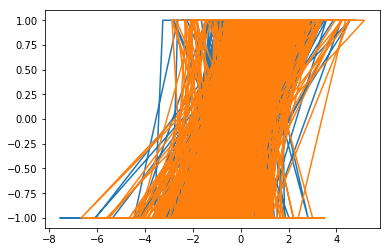

In [103]:
#C = 1000
svc_format_linear(1000,1)